In [1]:
#https://www.kaggle.com/adityapatil673/spam-detector-using-nlp-and-random-forest

In [2]:
import pandas as pd
import numpy as np

In [4]:
data =  pd.read_csv("Data/SMSSpamCollection.txt", sep = "\t", names=["label", "message"])

In [23]:
data['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

2. Write a clean function

    - Python needs to understand what are these words
    - We will let go of punctuations
    - Get rid of stop words
    - Break every sentence

In [8]:
import string
import nltk
#ps = nltk.PorterStemmer()
stopwords= nltk.corpus.stopwords.words('english')

def clean(sentence):
    s = "".join(x for x in sentence if x not in string.punctuation)
    temp = s.lower().split(' ')
    temp2 = [x for x in temp if x not in stopwords]
    return temp2

clean("hell peOople  are hOOow ! AAare ! you. enough.. are")

['hell', 'peoople', '', 'hooow', '', 'aaare', '', 'enough']

In [25]:
len(clean(data['message'][0]))

16

In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

3. Create a vectorizer & Transform into column features

    - Vectorizer is our engine which will take all sentences and convert them into columns
    - pass the clean function to apply our logic on it
    - The real magic begins here 
    - it creates columns of all known words 
    - values are assigned based on logic of tf idf method

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(analyzer=clean)
vector_output = vect.fit_transform(data['message'])

print(vect.get_feature_names()[0:100])
# these numbers are the columns

['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p', '087012131

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(analyzer=clean)
vector_output = vect.fit_transform(data['message'])

print(vect.get_feature_names()[0:100])
# these numbers are the columns

['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p', '087012131

In [65]:
print (vector_output [0:10])

  (0, 3787)	1
  (0, 4697)	1
  (0, 6447)	1
  (0, 2486)	1
  (0, 1390)	1
  (0, 1861)	1
  (0, 5688)	1
  (0, 3884)	1
  (0, 9211)	1
  (0, 4859)	1
  (0, 3017)	1
  (0, 1859)	1
  (0, 2201)	1
  (0, 3844)	1
  (0, 1157)	1
  (0, 8972)	1
  (1, 6008)	1
  (1, 4898)	1
  (1, 4665)	1
  (1, 9106)	1
  (1, 8629)	1
  (1, 6040)	1
  (2, 3572)	1
  (2, 3153)	2
  (2, 417)	1
  :	:
  (8, 6611)	1
  (8, 7022)	1
  (8, 2207)	2
  (8, 1928)	1
  (8, 219)	1
  (8, 2268)	1
  (8, 4814)	1
  (8, 8795)	1
  (8, 325)	1
  (8, 4239)	1
  (9, 8629)	1
  (9, 3572)	2
  (9, 1928)	1
  (9, 5532)	2
  (9, 314)	1
  (9, 5577)	1
  (9, 6754)	1
  (9, 3150)	1
  (9, 8718)	2
  (9, 4915)	1
  (9, 2291)	1
  (9, 5533)	1
  (9, 1964)	1
  (9, 2257)	1
  (9, 58)	1


In [66]:
pd.DataFrame(vector_output.toarray())

,0,1,2,3,4,5,6,7,8,9,...,9523,9524,9525,9526,9527,9528,9529,9530,9531,9532
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5569,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


4. Feature engineering
    - Time to be creative now
    - what features you think could be indicative of spam message
    - length
    - punctuation
    - contact numbers ? sms numbers

In [67]:
import re
data['len'] = data['message'].apply(lambda x : len(x) - x.count(" "))

In [68]:
data.head()

,label,message,len,long_number,short_number,punct,website
0,ham,"Go until jurong point, crazy.. Available only ...",92,0,0,9.783,0
1,ham,Ok lar... Joking wif u oni...,24,0,0,25.000,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,1,4,4.688,1
3,ham,U dun say so early hor... U c already then say...,39,0,0,15.385,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,0,0,4.082,0


In [69]:
test = "Hello people this is my contact 999999999 222 888888888 000"
len(re.findall('\d{7,}',test))
# for finding numbers with digits 4,5,6,7 we will write \d{4,7}
# for finding numbers with digits 7,8,9,10 .... and many more . We will write \d{7,}

2

In [70]:
data['long_number'] = data['message'].apply(lambda x : len(re.findall('\d{7,}',x)))
data['short_number'] = data['message'].apply(lambda x : len(re.findall('\d{4,6}',x)))

In [71]:
import string
def count_punct (text):
    count = sum([1 for x in text if x in string.punctuation])
    pp = round(100*count/(len(text)-text.count(" ")),3)
    return pp

data['punct'] = data['message'].apply(lambda x : count_punct(x))

testlink = "hello buddwwy httcp how cokm are you.co ww .co"

def  website (text):
    if (len(re.findall('www|http|com|\.co',text))>0):
        return 1
    else:
        return 0

#pd.set_option('display.max_colwidth', 0) 
#pd.DataFrame(data[data['label']=='spam']['body'])
print(website(testlink))
data['website'] = data['message'].apply(lambda x : website(x))
#pd.DataFrame(data[data['label']=='spam'])

1


5. How do these features look like ?
    - do they make sense ? 
    - how do they differ with spam and ham characteristic
    - are they really worth calling features

In [72]:
data[data['label']=='ham']['len']

0        92
1        24
3        39
4        49
6        62
       ... 
5565     10
5568     29
5569     48
5570    100
5571     21
Name: len, Length: 4825, dtype: int64

C:\Users\babas\Anaconda3\envs\NLP_3.6\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
C:\Users\babas\Anaconda3\envs\NLP_3.6\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


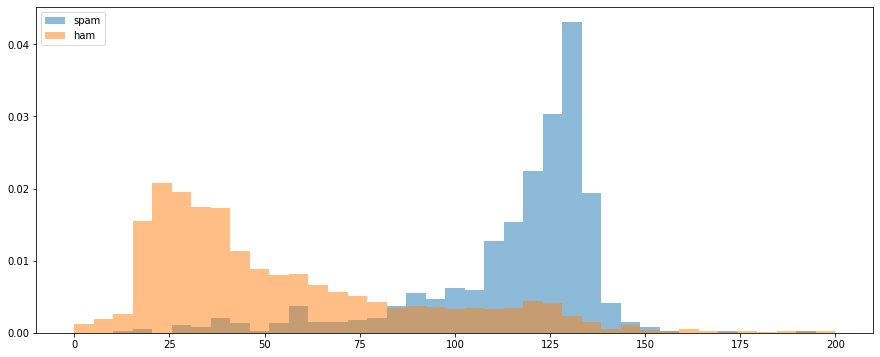

In [73]:
# how do they look like ? 
# 1 len

from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(15,6))

bins = np.linspace(0,200,num=40)
pyplot.hist(data[data['label']=='spam']['len'],bins,alpha=0.5,label='spam',normed=True)
pyplot.hist(data[data['label']=='ham']['len'],bins,alpha =0.5,label ='ham', normed=True)
pyplot.legend(loc ='upper left')
pyplot.show()

C:\Users\babas\Anaconda3\envs\NLP_3.6\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\Users\babas\Anaconda3\envs\NLP_3.6\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


<function matplotlib.pyplot.show(*args, **kw)>

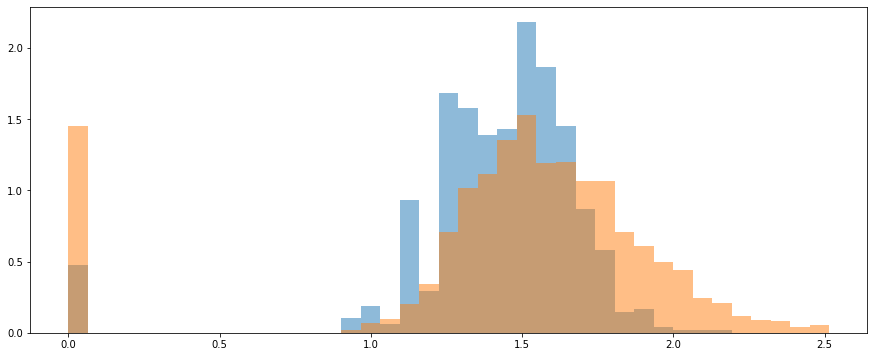

In [74]:
# punctuation 
pyplot.figure(figsize=(15,6))
i=4
bins = np.linspace(0,40**(1/i),num=40)
pyplot.hist(data[data['label']=='spam']['punct']**(1/i),bins,normed=True,label ='spam',alpha=0.5)
pyplot.hist(data[data['label']=='ham']['punct']**(1/i),bins, normed = True, label='ham',alpha=0.5)
pyplot.show

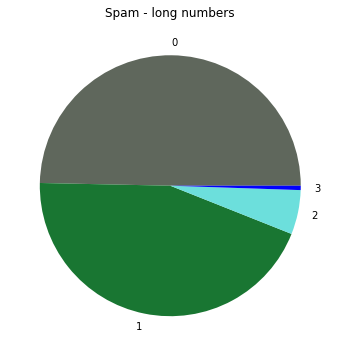

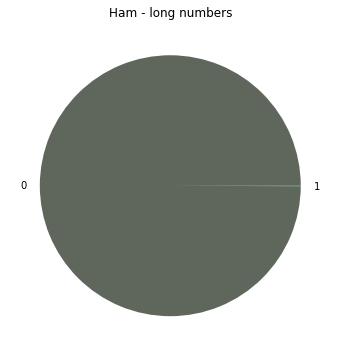

In [75]:
# Numbers

pyplot.figure(figsize=(6,6))
pyplot.pie(data[data['label']=='spam']['long_number'].value_counts(),labels=['0','1','2','3'], 
           colors=['#5f675c','#197632','#6cdfdc','blue'],)
pyplot.title("Spam - long numbers")
pyplot.show()


pyplot.figure(figsize=(6,6))
pyplot.pie(data[data['label']=='ham']['long_number'].value_counts(),labels=['0','1'], 
           colors=['#5f675c','#197632'],)
pyplot.title("Ham - long numbers")
pyplot.show()

In [76]:
data.columns

Index(['label', 'message', 'len', 'long_number', 'short_number', 'punct',
       'website'],
      dtype='object')

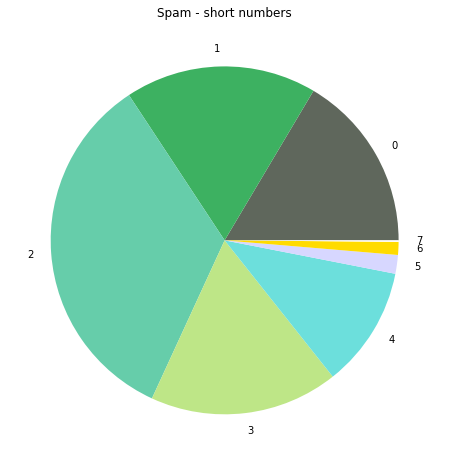

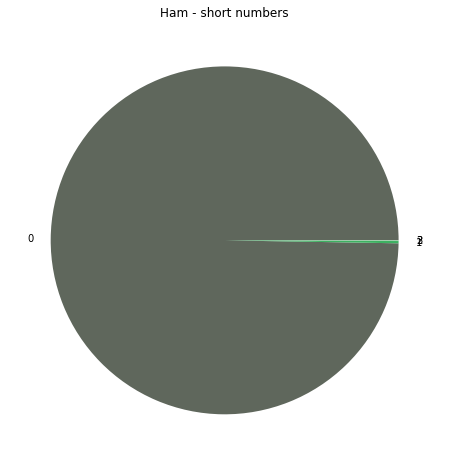

In [77]:
# short Numbers
green_pallete = ['#5f675c','#3db161','#66cdaa','#bee687','#6cdfdc','#d7d7ff','#ffdb00','white']

spam_x = data[data['label']=='spam']['short_number'].value_counts()
spam_x.sort_index(inplace=True)
pyplot.figure(figsize=(8,8))
pyplot.pie(spam_x,labels=spam_x.index,startangle=0,colors=green_pallete)
pyplot.title("Spam - short numbers")
pyplot.show()

ham_x = data[data['label']=='ham']['short_number'].value_counts()
ham_x.sort_index(inplace=True)
pyplot.figure(figsize=(8,8))
pyplot.pie(ham_x,labels=ham_x.index, colors=green_pallete)
pyplot.title("Ham - short numbers")
pyplot.show()

6. Create x features & Split data in test and train
    - need to extract test and train data
    - we will split it by 1: 5

In [78]:
x_features = pd.concat([data['len'],data['long_number'],data['short_number'],data['punct'],data['website'],pd.DataFrame(vector_output.toarray())],axis=1)
#,pd.DataFrame(vector_output.toarray())
#,data['long_number'],data['short_number']

In [79]:
x_features

,len,long_number,short_number,punct,website,0,1,2,3,4,...,9523,9524,9525,9526,9527,9528,9529,9530,9531,9532
0,92,0,0,9.783,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24,0,0,25.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,128,1,4,4.688,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,0,0,15.385,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49,0,0,4.082,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,131,1,2,6.107,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,29,0,0,3.448,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5569,48,0,0,14.583,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,100,0,0,1.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

x_train, x_test, y_train, y_test = train_test_split(x_features,data['label'])
rf = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)
rf_model = rf.fit(x_train,y_train)
sorted(zip(rf_model.feature_importances_,x_train.columns),reverse=True)[0:20]

[(0.14339803777220356, 'short_number'),
 (0.07339926066334013, 'long_number'),
 (0.035113084776454084, 'len'),
 (0.02504379307666826, 8613),
 (0.019135388826551435, 1928),
 (0.019087440967250402, 5532),
 (0.012969885608022445, 7892),
 (0.01224207652351131, 3572),
 (0.01207490404170432, 2207),
 (0.011419939469864995, 8741),
 (0.009369725182937487, 6611),
 (0.008628478772420223, 7331),
 (0.00860981436563765, 9120),
 (0.007947792726293111, 2386),
 (0.007736705608653229, 382),
 (0.007525421214053935, 8236),
 (0.006835935319640558, 377),
 (0.006560646457488195, 'punct'),
 (0.005651604015396625, 3923),
 (0.005643842810344864, 2555)]

7. Predict & Check your score
    - need to understand what would happen if we use only len & punctuation
    - OR if we used  all features but not tf idf ?
    - you can see below - how the precision jumps when we add tf idf 

In [81]:
y_pred=rf_model.predict(x_test)
precision,recall,fscore,support =score(y_test,y_pred,pos_label='spam', average ='binary')
print('Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision,3),round(recall,3),round(fscore,3),round((y_pred==y_test).sum()/len(y_test),3)))

Precision : 0.988 / Recall : 0.866 / fscore : 0.923 / Accuracy: 0.98


Len + punct *** Precision : 0.557 / Recall : 0.566 / fscore : 0.562 / Acc: 0.89

Len + punct + nums *** Precision : 0.914 / Recall : 0.905 / fscore : 0.909 / Acc: 0.974 (major jump in performance)

rest + website *** Precision : 0.901 / Recall : 0.901 / fscore : 0.901 / Acc: 0.974

All features + tfidf *** Precision : 0.984 / Recall : 0.909 / fscore : 0.945 / Acc: 0.985 (Marginal but very critical jump in precision)